In [1]:
%load_ext autoreload
%autoreload 2

from imports import *
from utils import *
from models import *
from data import *
from ginr_experiment import *
from ginr_configs import CONFIGS

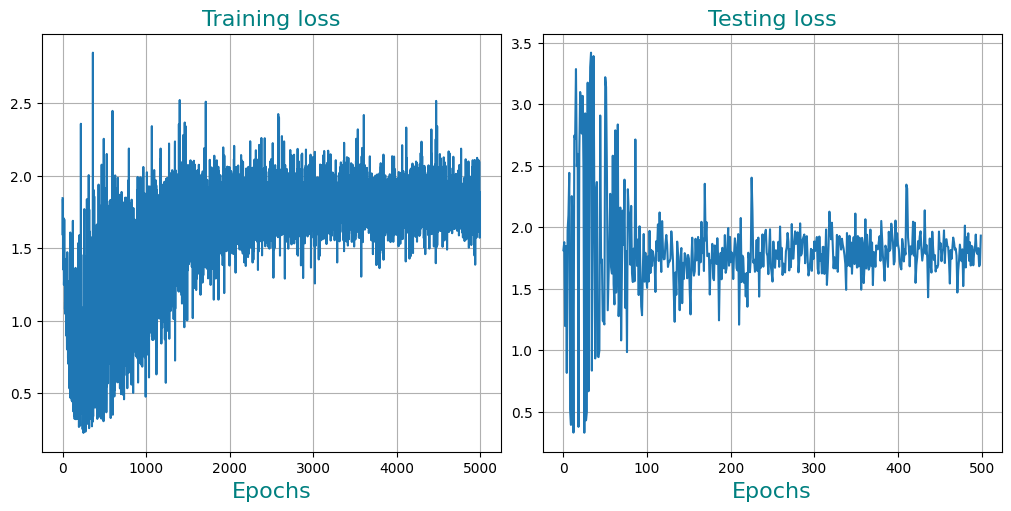

In [23]:
regular_bunny_3_fourier = GINR_Experiment("regular_bunny_3_fourier", CONFIGS["regular_bunny_3_fourier"])
regular_bunny_3_fourier.plot()

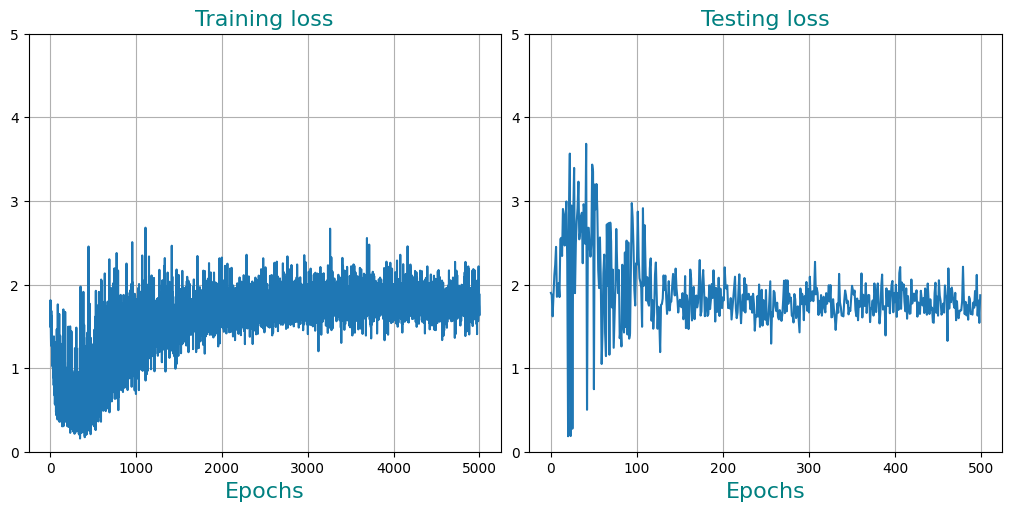

In [37]:
regular_bunny_5_fourier = GINR_Experiment("regular_bunny_5_fourier", CONFIGS["regular_bunny_5_fourier"])
regular_bunny_5_fourier.plot()

In [ ]:
regular_bunny_10_fourier = GINR_Experiment("regular_bunny_10_fourier", CONFIGS["regular_bunny_10_fourier"])
regular_bunny_10_fourier.plot()

In [17]:
n_fourier = 10

cloud_file = os.path.abspath('./bunny0.obj')
output_file = os.path.abspath('./bunny0_{}_fourier'.format(n_fourier))

mesh = load_mesh(cloud_file)

points, adj = mesh_to_graph(mesh)

u = get_fourier(adj, n_fourier)

np.save(output_file, u)

(452, 3)